In [1]:
!pip install fredapi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import plotly.express as px

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns',500)
color_pal=plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'd998cb977a3a667b9b7702acf332ad0b'

# 1. Create the Fred Object

In [4]:
fred = Fred(api_key=fred_key)

# 2. Search for Economic data from Fred

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-03-16   2023-03-16   
CSUSHPINSA          CSUSHPINSA     2023-03-16   2023-03-16   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-03-16   2023-03-16   
SP500                    SP500     2023-03-16   2023-03-16   
CSUSHPISA            CSUSHPISA     2023-03-16   2023-03-16   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-03-14  Daily, Close   
CSUSHPINSA            1987-01-01      2022-12-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-03-14  Daily, Close   
SP500                 2013-03-18      2023-03-15  Daily, Close   
CSUSHPISA             1987-01-01      2022-12-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   
SP500                        D               Index               Index   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-03-15 08:55:14-05:00         95   
CSUSHPINSA      2023-02-28 08:02:02-06:00         90   
BAMLH0A0HYM2EY  2023-03-15 08:55:18-05:00         84   
SP500           2023-03-15 19:10:57-05:00         83   
CSUSHPISA       2023-02-28 08:02:04-06:00         81   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
SP500           The observations for the S&P 500 represent the...  
CSUSHPISA       For more information regarding the index, plea...

# 3. Pull Raw Data of SP500

In [7]:
sp500 = fred.get_series(series_id='SP500')

In [8]:
sp500.describe()

count    2517.000000
mean     2792.794271
std       871.974119
min      1541.610000
25%      2066.960000
50%      2644.690000
75%      3380.350000
max      4796.560000
dtype: float64

<AxesSubplot:title={'center':'S&P 500'}>

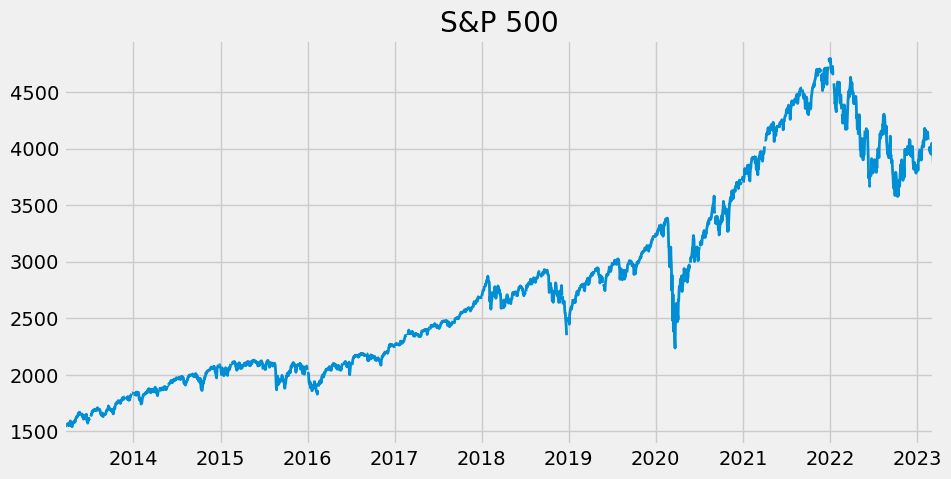

In [9]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series (unemployment rate of states)

In [10]:
unempt_rs = fred.search('unemployment')

In [11]:
unrate_rs = fred.get_series('UNRATE')

<AxesSubplot:>

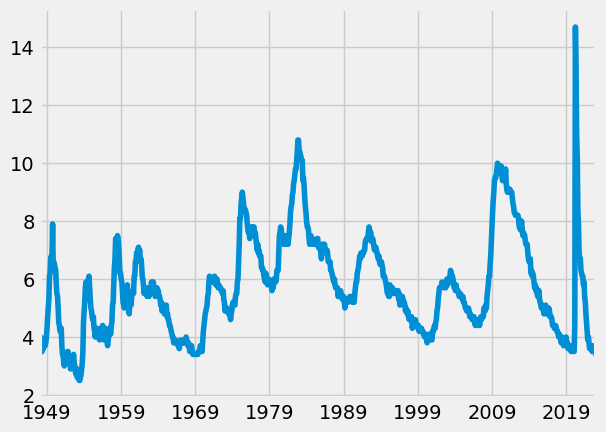

In [12]:
unrate_rs.plot()

In [13]:
#let's try out another search
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df.shape

(58, 15)

In [14]:
fred.get_series('LASMT391746000000003')

1990-01-01    4.8
1990-02-01    4.8
1990-03-01    4.7
1990-04-01    4.8
1990-05-01    4.8
             ... 
2022-08-01    4.6
2022-09-01    4.6
2022-10-01    4.5
2022-11-01    4.5
2022-12-01    4.5
Length: 396, dtype: float64

In [15]:
len(unemp_df.index)

58

In [16]:
resultList = []

# Convert all the filtered datasets into dataframes and add to list 
for i in unemp_df.index:
    result = fred.get_series(i)
    result = result.to_frame(name=i)
    resultList.append(result)

In [17]:
len(resultList)

58

In [18]:
resultList[0]

CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2022-08-01   4.1
2022-09-01   3.8
2022-10-01   4.0
2022-11-01   4.1
2022-12-01   4.1

[564 rows x 1 columns]

In [19]:
#let's concatenate the list items together, axis=1, to stack the side by side(column)
unemp_results = pd.concat(resultList, axis=1)

In [20]:
# drop records with nulls:
unemp_states = unemp_results.dropna(axis=1)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()

# using list comprehension for mapping the state codes with names:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [21]:
unemp_states.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2022-08-01    0
2022-09-01    0
2022-10-01    0
2022-11-01    0
2022-12-01    0
Freq: MS, Length: 564, dtype: int64

<AxesSubplot:>

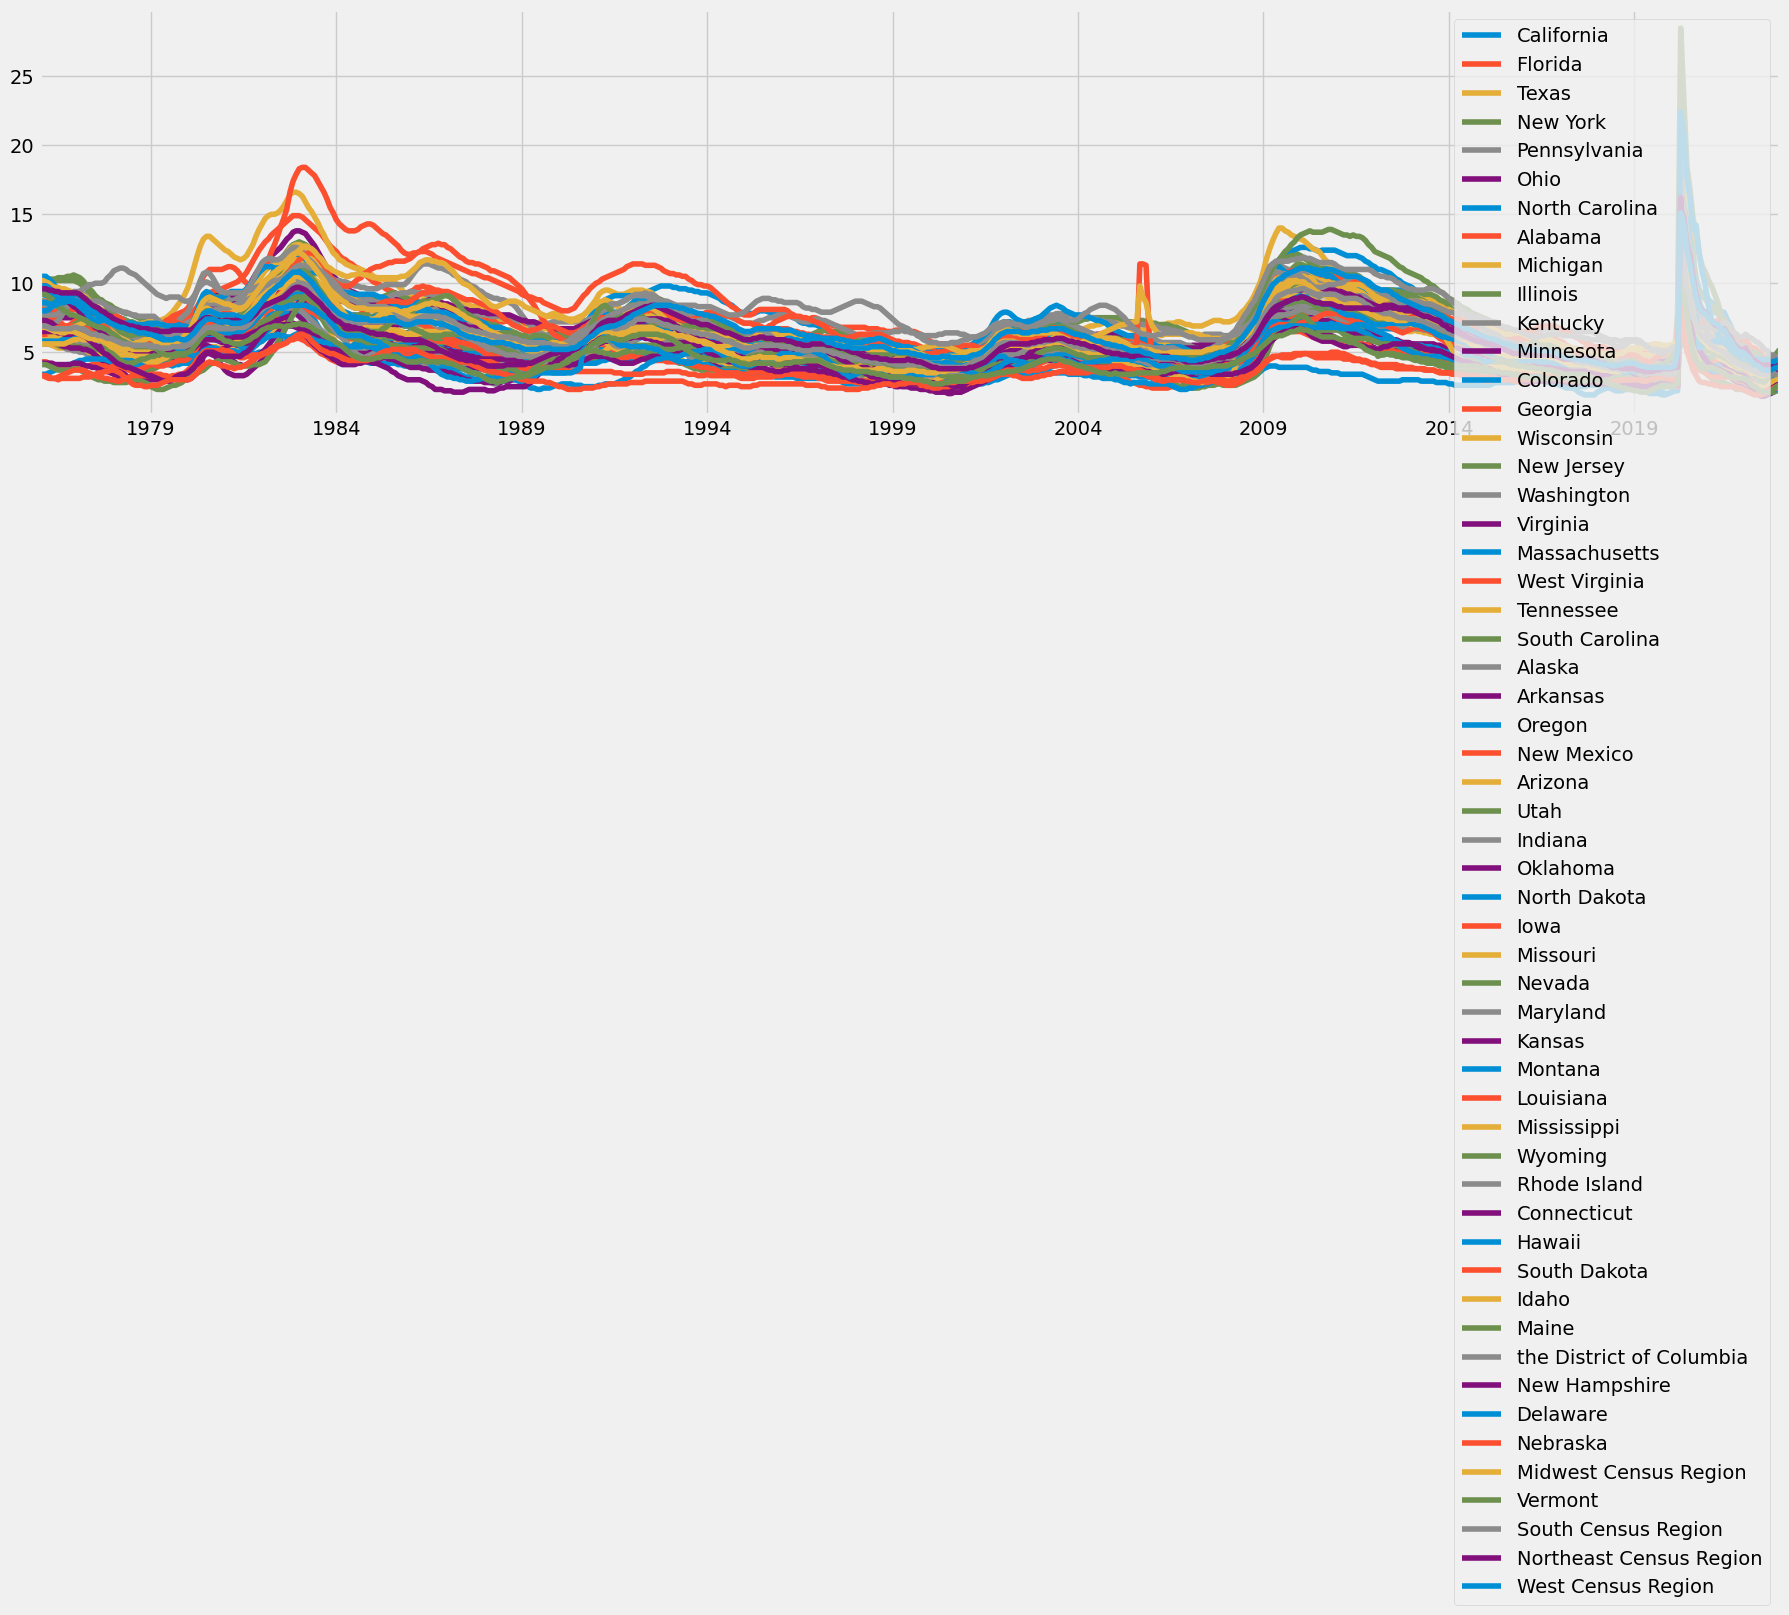

In [22]:
#plt.plot()
#px.line(unemp_states)
#fig.show()
unemp_states.plot(kind='line', figsize=(20,5))

## Pull April 2020 Unemployement Rate Per State

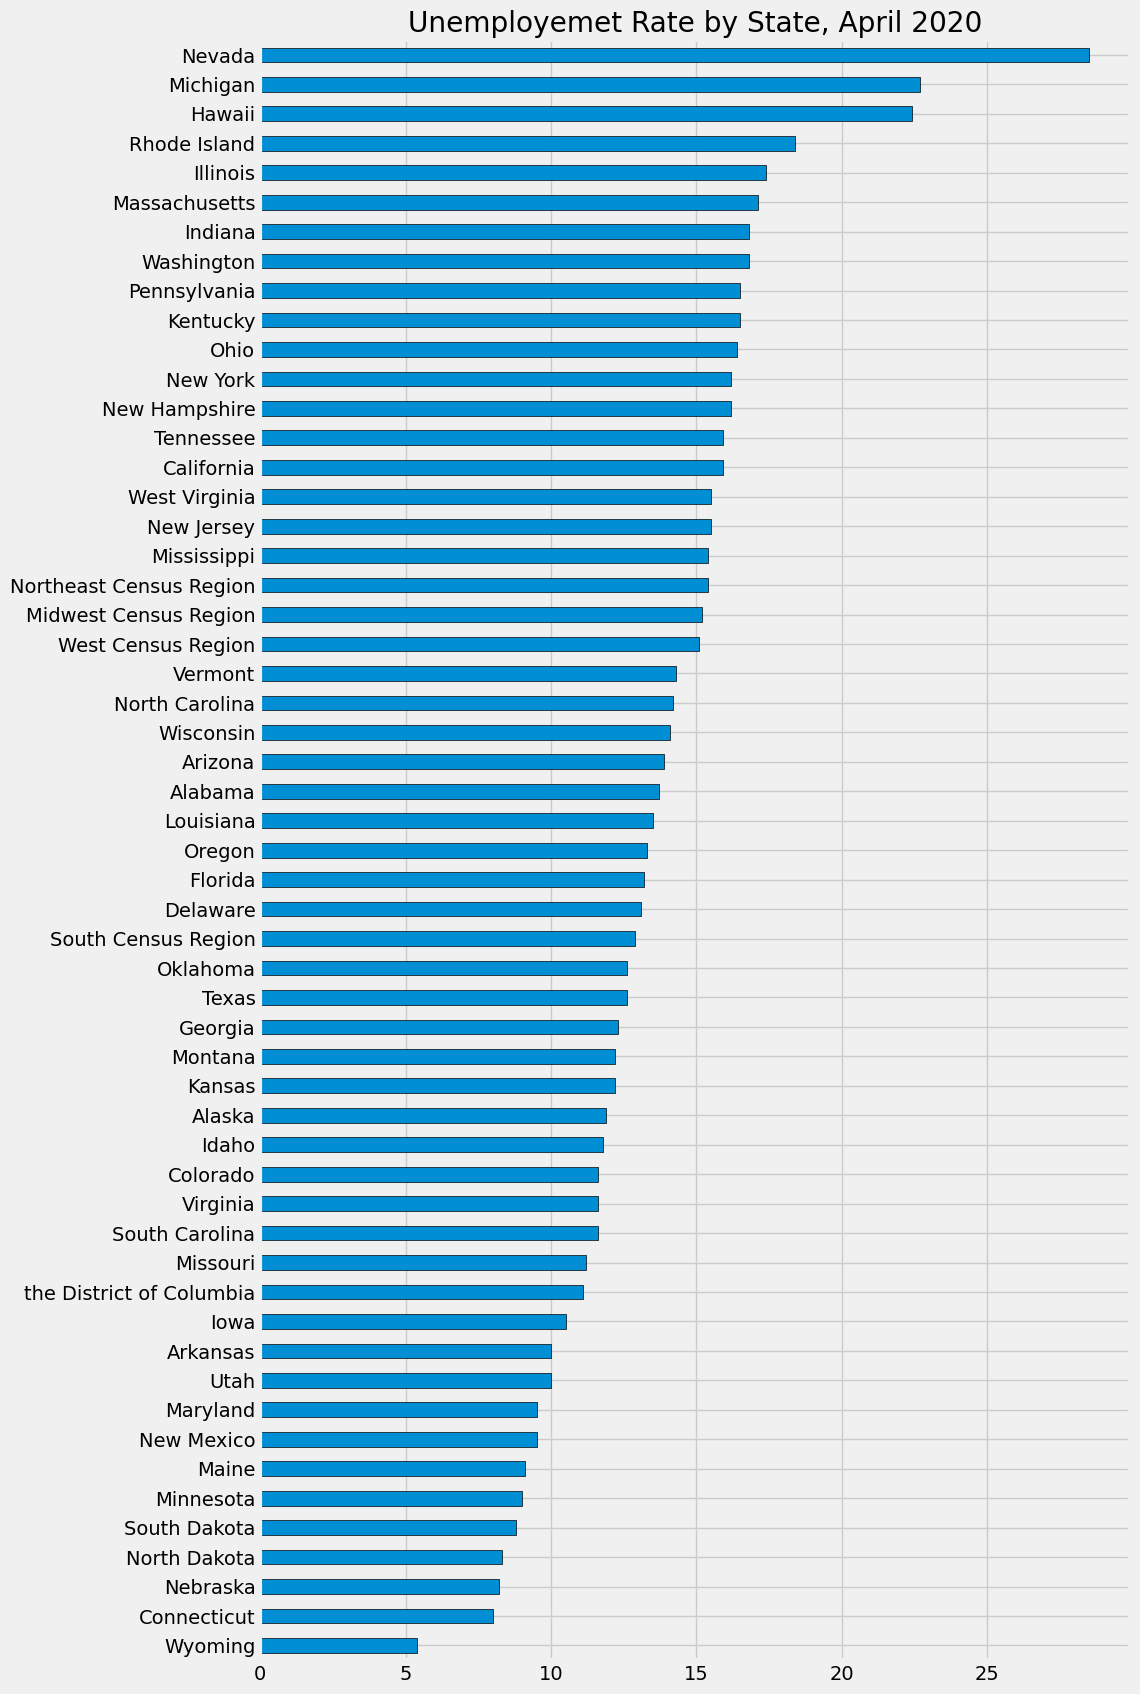

In [23]:
ax = unemp_states.loc[unemp_states.index == '2020-04-01'].T\
    .sort_values('2020-04-01')\
    .plot(kind='barh', figsize=(10,20), edgecolor='black', \
          title='Unemployemet Rate by State, April 2020')
ax.legend().remove()
plt.show()

In [24]:
unemp_states

California  Florida  Texas  New York  Pennsylvania  Ohio  \
1976-01-01         9.2      9.7    5.8      10.3           8.0   8.1   
1976-02-01         9.2      9.7    5.8      10.3           8.1   8.1   
1976-03-01         9.1      9.6    5.9      10.2           8.1   8.1   
1976-04-01         9.1      9.5    5.9      10.2           8.1   8.0   
1976-05-01         9.0      9.3    5.9      10.1           8.1   7.8   
...                ...      ...    ...       ...           ...   ...   
2022-08-01         4.1      2.7    4.1       4.7           4.2   4.0   
2022-09-01         3.8      2.5    4.0       4.3           4.1   4.0   
2022-10-01         4.0      2.7    4.0       4.3           4.0   4.2   
2022-11-01         4.1      2.6    4.0       4.3           4.0   4.2   
2022-12-01         4.1      2.5    3.9       4.3           3.9   4.2   

            North Carolina  Alabama  Michigan  Illinois  ...  Maine  \
1976-01-01             6.4      6.6       9.9       6.6  ...    8.7   
1976-02-01             6.4      6.6       9.9       6.6  ...    8.7   
1976-03-01             6.4      6.6       9.9       6.6  ...    8.6   
1976-04-01             6.3      6.5       9.8       6.6  ...    8.6   
1976-05-01             6.1      6.4       9.6       6.6  ...    8.5   
...                    ...      ...       ...       ...  ...    ...   
2022-08-01             3.5      2.6       4.1       4.5  ...    3.1   
2022-09-01             3.6      2.6       4.1       4.5  ...    3.3   
2022-10-01             3.8      2.7       4.2       4.6  ...    3.6   
2022-11-01             3.9      2.7       4.3       4.7  ...    3.7   
2022-12-01             3.9      2.8       4.3       4.7  ...    3.8   

            the District of Columbia  New Hampshire  Delaware  Nebraska  \
1976-01-01                       8.7            6.5       8.0       3.3   
1976-02-01                       8.7            6.5       8.0       3.3   
1976-03-01                       8.6            6.5       8.0       3.3   
1976-04-01                       8.5            6.5       8.1       3.2   
1976-05-01                       8.4            6.5       8.3       3.1   
...                              ...            ...       ...       ...   
2022-08-01                       5.1            2.0       4.5       2.1   
2022-09-01                       4.7            2.2       4.3       2.2   
2022-10-01                       4.8            2.4       4.3       2.4   
2022-11-01                       4.6            2.6       4.4       2.5   
2022-12-01                       4.7            2.7       4.4       2.6   

            Midwest Census Region  Vermont  South Census Region  \
1976-01-01                    6.8      8.6                  6.9   
1976-02-01                    6.8      8.6                  6.9   
1976-03-01                    6.8      8.6                  6.9   
1976-04-01                    6.7      8.6                  6.8   
1976-05-01                    6.6      8.5                  6.7   
...                           ...      ...                  ...   
2022-08-01                    3.4      2.1                  3.4   
2022-09-01                    3.4      2.1                  3.3   
2022-10-01                    3.5      2.3                  3.4   
2022-11-01                    3.6      2.5                  3.4   
2022-12-01                    3.6      2.6                  3.4   

            Northeast Census Region  West Census Region  
1976-01-01                      9.6                 8.6  
1976-02-01                      9.6                 8.6  
1976-03-01                      9.6                 8.6  
1976-04-01                      9.5                 8.5  
1976-05-01                      9.5                 8.5  
...                             ...                 ...  
2022-08-01                      4.1                 3.7  
2022-09-01                      3.9                 3.7  
2022-10-01                      3.9                 3.8  
2022-11-

# 5. Pull Participation Rate:

In [25]:
partiRate_df = fred.search('participation rate state for ', filter=('frequency','Monthly'))
partiRate_df = partiRate_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
partiRate_df = partiRate_df.loc[partiRate_df['title'].str.contains('Labor Force Participation Rate for ')]
partiRate_df.shape

(51, 15)

In [26]:
fred.get_series('CIVPART')

1948-01-01    58.6
1948-02-01    58.9
1948-03-01    58.5
1948-04-01    59.0
1948-05-01    58.3
              ... 
2022-10-01    62.2
2022-11-01    62.2
2022-12-01    62.3
2023-01-01    62.4
2023-02-01    62.5
Length: 902, dtype: float64

In [27]:
# Creating a dictionary for StateCode:StateName
partiId_to_state = partiRate_df['title'].str.replace('Labor Force Participation Rate for ', '')\
                    .to_dict()


In [28]:
# pull the all the states data series into a list:
all_result_lst = []

for i in partiRate_df.index:
    result=fred.get_series(i)
    result=result.to_frame(name=i)
    all_result_lst.append(result)

#let's concatenate the list items together, axis=1, to stack the side by side(column)
parti_states = pd.concat(all_result_lst, axis=1)

parti_states.shape

# checking on nulls
parti_states.isna().sum()


# using list comprehension for mapping the state codes with names:
parti_states.columns = [partiId_to_state[c] for c in parti_states.columns]

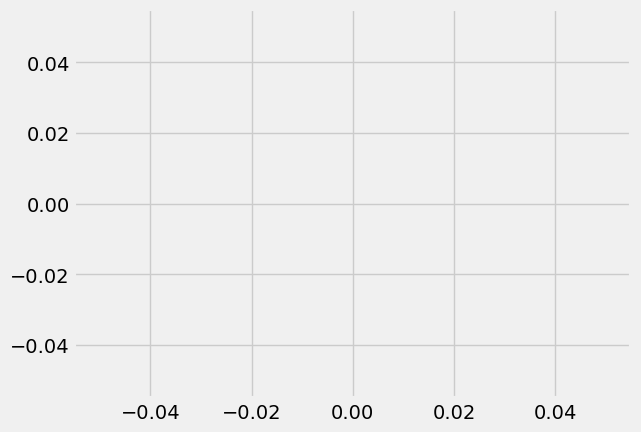

In [29]:
#parti_results.plot(kind='line', figsize=(20,5))
plt.plot()
fig= px.line(parti_states)
fig.show()

# 6. Plot Unemployment Vs Participation

In [30]:
# Before ploting them together lets compare the column names of both dfs:
unemp_states.columns.difference(parti_states.columns)
len(unemp_states.columns)
len(parti_states.columns)

# found 6 extra state names in unemp_states, 
# and 1 state with different name - 'the District of Columbia'

#excluding the difference columns:
unemp_states = unemp_states.loc[:,~unemp_states.columns.isin(['East South Central Census Division', 'Midwest Census Region',
       'New England Census Division', 'Northeast Census Region',
       'South Census Region', 'West Census Region'])]

# replacing the column 'the District of Columbia'
unemp_states.loc[:,['the District of Columbia']]
parti_states.loc[:,['District Of Columbia']]

# fix DC
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

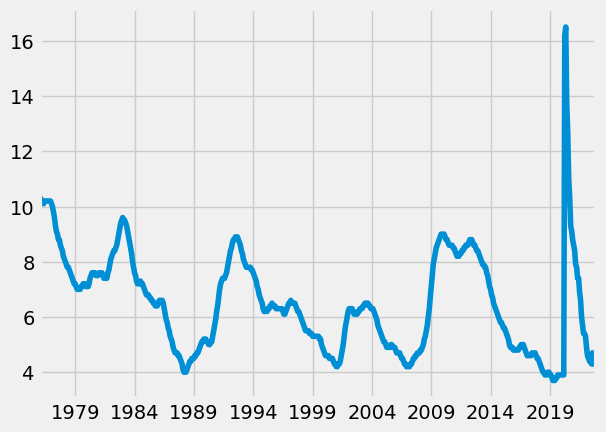

In [31]:
# Lets consider the state New York
unemp_states["New York"].plot()
plt.show()

<AxesSubplot:>

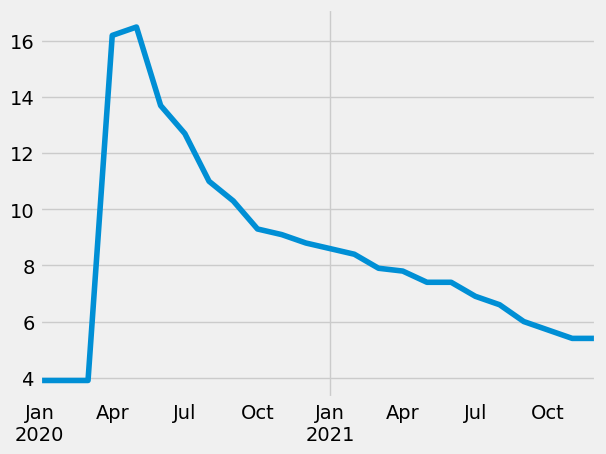

In [32]:
# unemployment plot for period between 2020 and 2022 for state: NewYork
unemp_states.query('index >= 2020 and index < 2022')['New York'].plot()


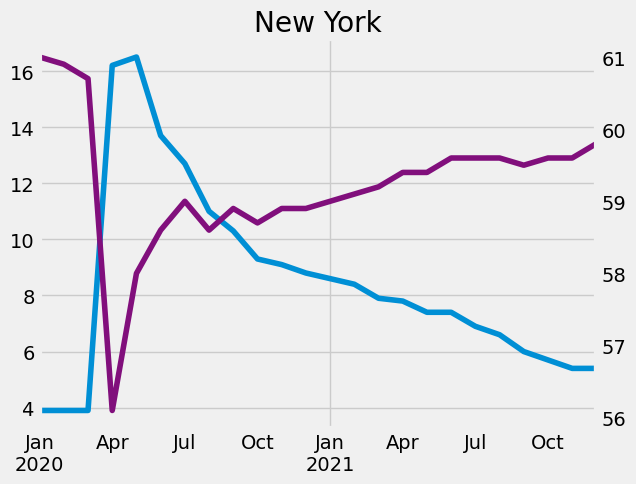

In [33]:
# plotting both umemployment and participation in same canvas:

fig,ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax, label='Unemployement')
parti_states.query('index >= 2020 and index < 2022')['New York'].plot(ax=ax2, label='Participation'\
                                                                      , color=color_pal[5])
ax2.grid(False)
ax.set_title('New York')
plt.show()

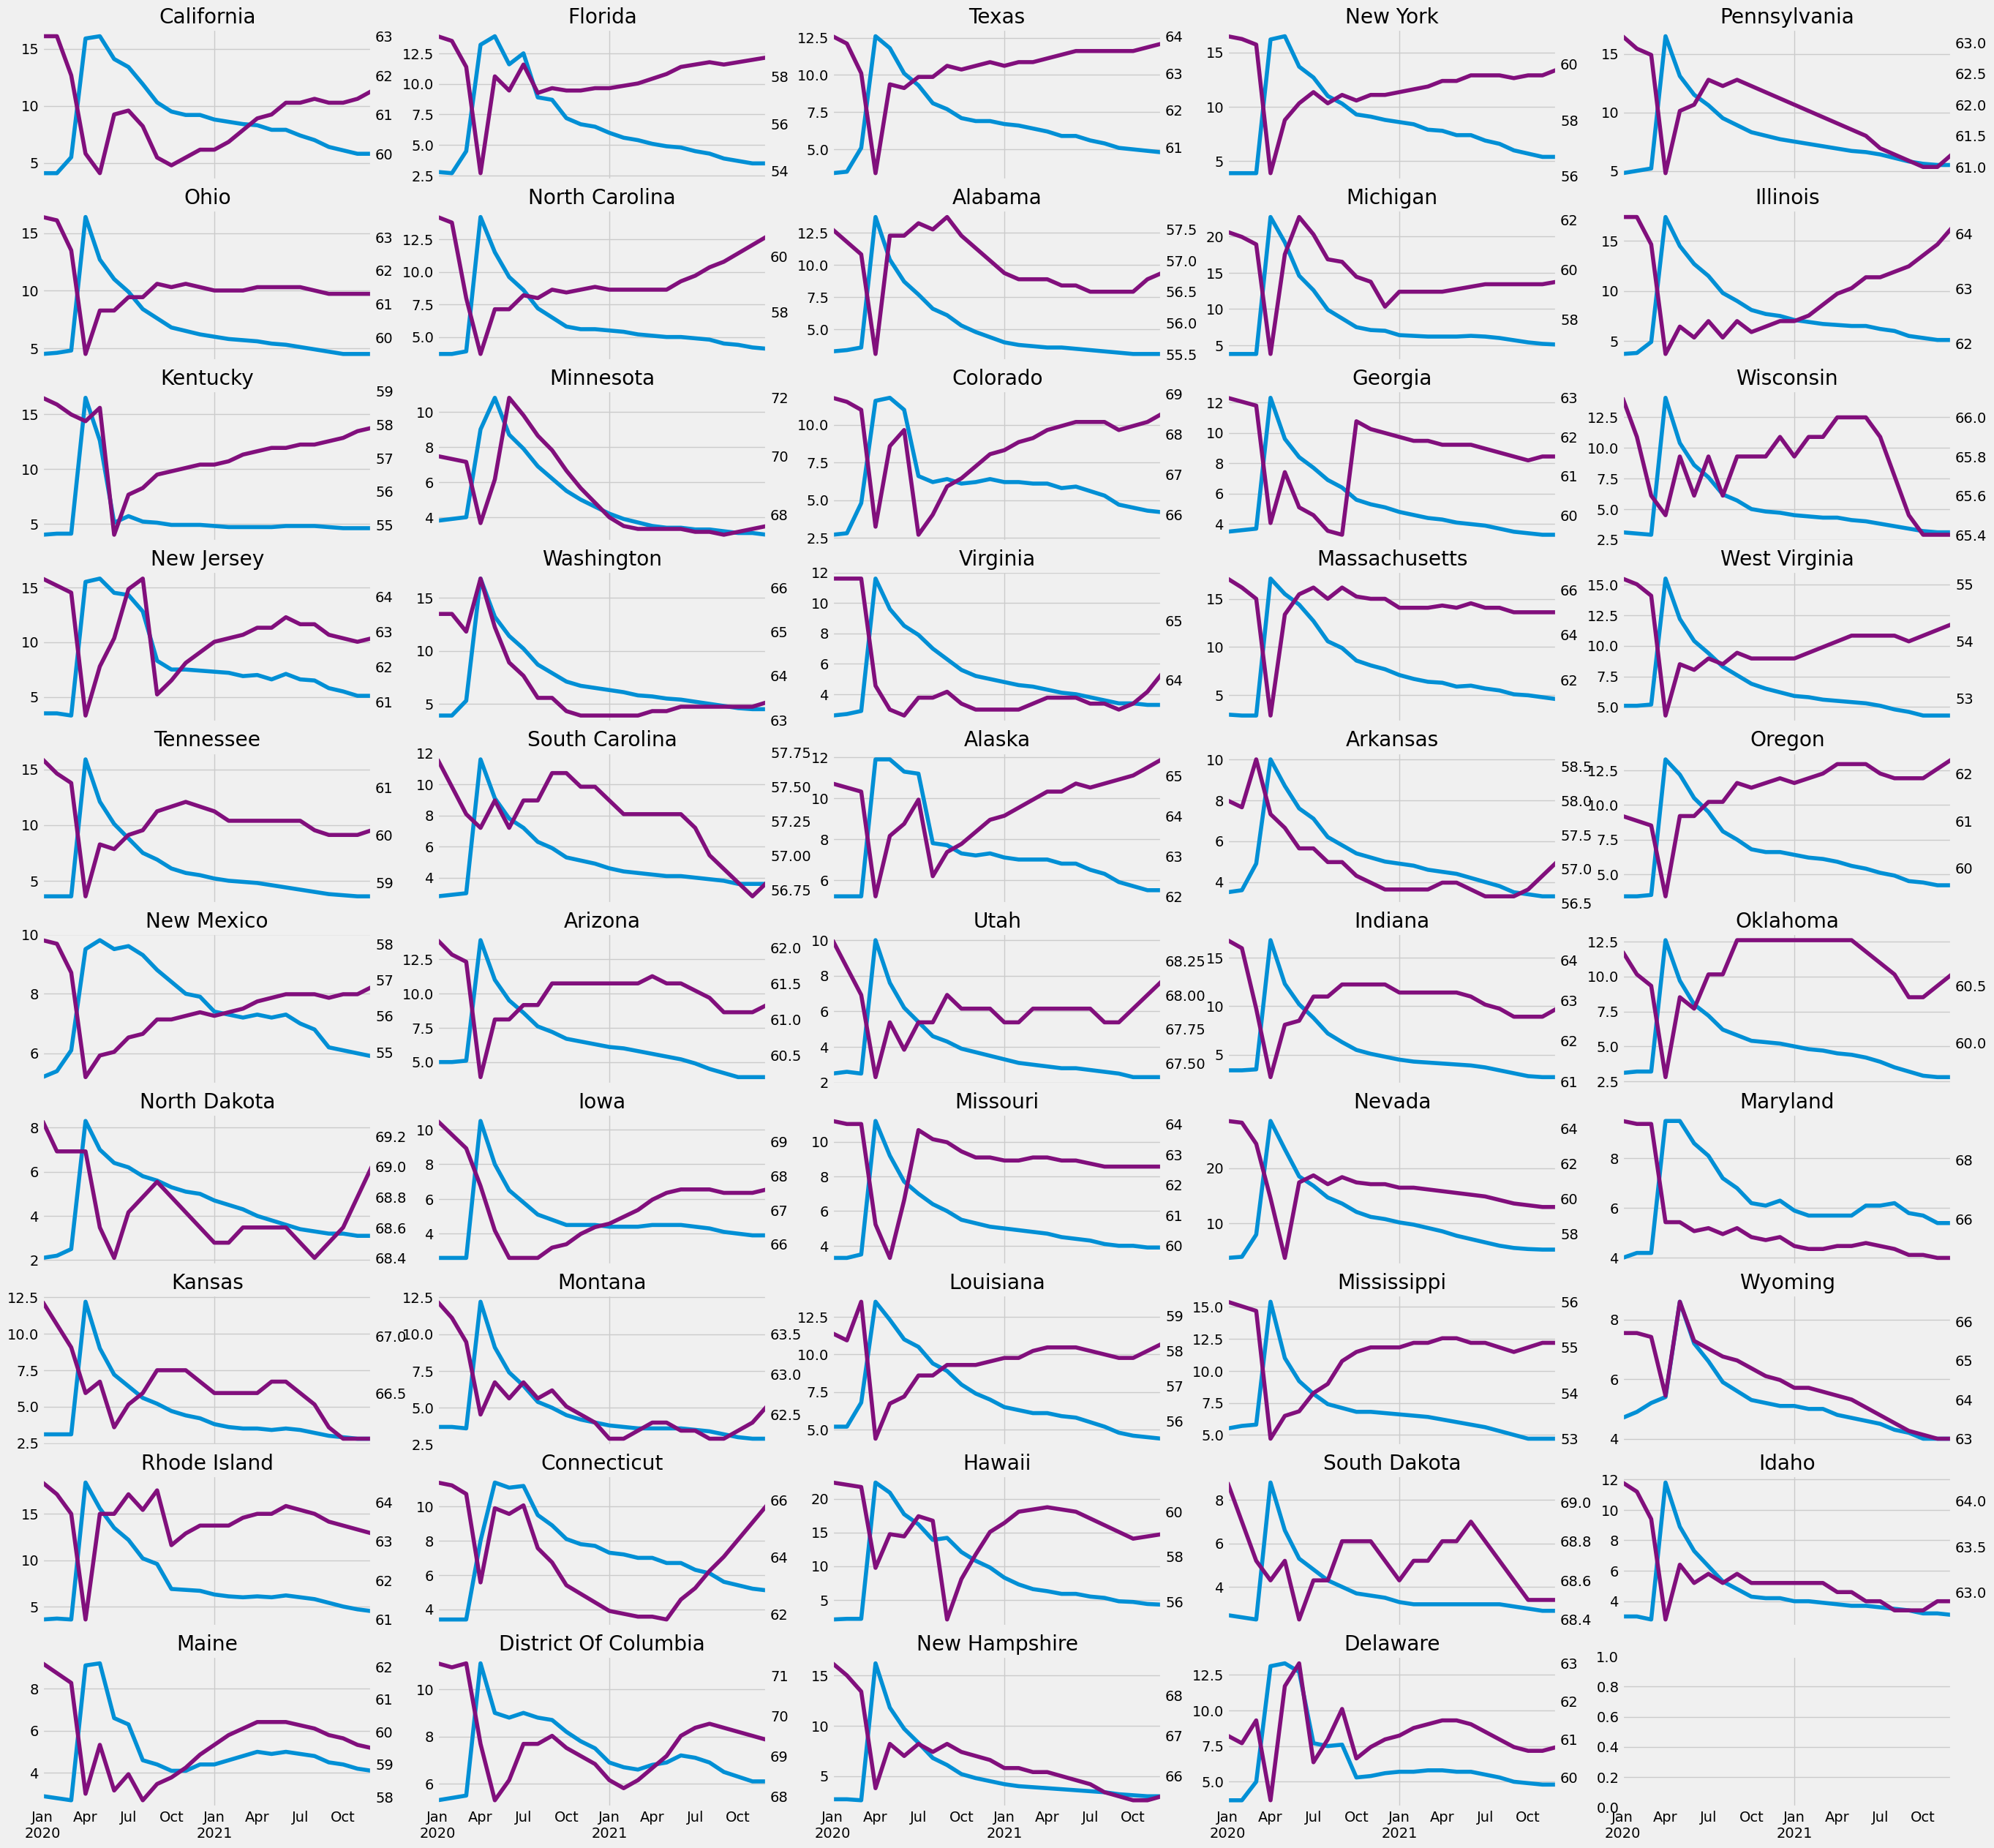

In [34]:
# Lets plot for all the states:

fig, axs = plt.subplots(10,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    ax2=axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployement')
    parti_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation'\
                                                                          , color=color_pal[5])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
    #print(i)
    if i == 49:
        break
plt.show()